# house_prices_kaggle

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error
from category_encoders import TargetEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from utils.utils_house_prices import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [17]:
# import data

df = pd.read_csv('train.csv')
df['SalePrice'] = np.log1p(df['SalePrice'])
df_labels = df['SalePrice'].copy()

# split into train and validation set before doing target mean encoding to prevent leakage! 

train_set, val_set, train_lab, val_lab = train_test_split(df, df_labels, random_state = 42)

In [18]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024057
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399449
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474


In [15]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1095.000000,1095.000000,895.000000,1095.000000,1095.000000,1095.00000,1095.000000,1095.000000,1091.000000,1095.000000,1095.000000,1095.000000,1095.00000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1037.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,727.669406,57.118721,70.394413,10747.046575,6.129680,5.56895,1971.107763,1984.854795,103.368469,448.178082,43.790868,568.794521,1060.76347,1170.582648,354.767123,5.863927,1531.213699,0.421005,0.057534,1.578995,0.380822,2.896804,1.044749,6.564384,0.619178,1978.694311,1.784475,477.539726,96.194521,49.633790,21.118721,3.918721,15.917808,3.152511,40.529680,6.361644,2007.818265,12.031055
std,424.545069,42.624531,25.219301,11065.878057,1.366746,1.10448,30.605697,20.732472,171.644715,457.898505,153.896464,444.865511,443.87948,386.930314,440.752719,48.961376,527.197908,0.517444,0.236858,0.544976,0.496972,0.806361,0.215504,1.625103,0.644338,24.810675,0.733836,210.563755,130.396336,69.134174,61.315608,32.186042,56.844110,43.008391,328.354566,2.680894,1.325752,0.393481
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.00000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.00000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,360.500000,20.000000,59.000000,7589.000000,5.000000,5.00000,1953.500000,1966.000000,0.000000,0.000000,0.000000,221.500000,795.50000,892.000000,0.000000,0.000000,1148.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,349.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775297
50%,728.000000,50.000000,70.000000,9600.000000,6.000000,5.00000,1972.000000,1994.000000,0.000000,387.000000,0.000000,474.000000,996.00000,1096.000000,0.000000,0.000000,1478.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.013707
75%,1096.500000,70.000000,80.000000,11700.000000,7.000000,6.00000,2001.000000,2004.000000,166.000000,724.000000,0.000000,810.500000,1299.50000,1393.000000,730.500000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.278398
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.00000,2010.000000,2010.000000,1378.000000,5644.000000,1127.000000,2336.000000,6110.00000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,13.521141


In [12]:
val_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,365.000000,365.000000,306.000000,365.000000,365.000000,365.000000,365.000000,365.000000,361.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,342.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,738.991781,56.232877,69.042484,9826.172603,6.008219,5.594521,1971.747945,1984.898630,104.642659,430.024658,54.824658,562.578082,1047.427397,1138.758904,323.668493,5.786301,1468.213699,0.438356,0.057534,1.523288,0.389041,2.775342,1.052055,6.378082,0.594521,1977.935673,1.715068,459.301370,88.394521,37.739726,24.460274,1.882192,12.490411,1.578082,52.367123,6.202740,2007.808219,12.003064
std,413.137669,41.363944,21.323922,5536.437608,1.428685,1.138716,28.996533,20.410166,207.210795,451.002628,181.758238,433.315562,423.240317,385.100746,423.338202,47.660006,518.140296,0.523783,0.244678,0.567073,0.520872,0.837937,0.234468,1.620460,0.646183,24.346387,0.785107,222.983706,108.719535,55.896054,60.540257,18.123806,52.352966,30.149218,813.899801,2.771022,1.336897,0.416693
min,16.000000,20.000000,21.000000,1491.000000,2.000000,2.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.471978
25%,375.000000,20.000000,59.000000,7332.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,227.000000,796.000000,864.000000,0.000000,0.000000,1069.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,11.761355
50%,745.000000,50.000000,67.500000,9098.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,360.000000,0.000000,481.000000,968.000000,1040.000000,0.000000,0.000000,1430.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,457.000000,12.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,11.951187
75%,1093.000000,70.000000,80.000000,11310.000000,7.000000,6.000000,1999.000000,2004.000000,160.000000,685.000000,0.000000,799.000000,1293.000000,1352.000000,728.000000,0.000000,1720.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.240479
max,1451.000000,190.000000,174.000000,70761.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,2188.000000,1474.000000,2153.000000,3206.000000,2898.000000,1872.000000,514.000000,4316.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2009.000000,4.000000,1390.000000,511.000000,502.000000,318.000000,238.000000,396.000000,576.000000,15500.000000,12.000000,2010.000000,13.534474


## Data Preprocessing

In [ ]:
train_set.sample(10)

In [ ]:
#encode the training set using target mean encoding for categorical values (function in utils.py)

train_set = encode_dataframe(train_set, train=True)

In [ ]:
#train_set.sample(10)

In [5]:
# Problem: some categorical feature values appear in the validation set but not in the training set, so they
# do not have a target mean that can be mapped onto the feature values in the validation set

# setp 1: create dictionary with global SalePrice mean for every categorical feature value in the whole dataframe

train_val_categorical_global_means = {feature_encoded: 
 {feature_value: 
  df["SalePrice"].mean() for feature_value in df[feature].unique()} 
 for feature, feature_encoded in zip(categorical_features, categorical_features_encoded)}

# feature_encoded: {...} --> create dictionary key for all encoded categorical features as name (e.g. 'Neighborhood_encoded')
# feature_value: ... --> create dictionary in dictionary with feature_value as key for each categorical feature (e.g. 'Veenker')
# df.['SalePrice'].mean() --> create value for each feature_value (value is always mean of SalePrice)
# result: {'Neighborhood_encoded': {'Veenker': 180921.19589041095}}

train_val_categorical_global_means

{'MSSubClass_encoded': {60: 12.024057394918371,
  20: 12.024057394918371,
  70: 12.024057394918371,
  50: 12.024057394918371,
  190: 12.024057394918371,
  45: 12.024057394918371,
  90: 12.024057394918371,
  120: 12.024057394918371,
  30: 12.024057394918371,
  85: 12.024057394918371,
  80: 12.024057394918371,
  160: 12.024057394918371,
  75: 12.024057394918371,
  180: 12.024057394918371,
  40: 12.024057394918371},
 'MSZoning_encoded': {'RL': 12.024057394918371,
  'RM': 12.024057394918371,
  'C (all)': 12.024057394918371,
  'FV': 12.024057394918371,
  'RH': 12.024057394918371},
 'Street_encoded': {'Pave': 12.024057394918371, 'Grvl': 12.024057394918371},
 'Alley_encoded': {nan: 12.024057394918371,
  'Grvl': 12.024057394918371,
  'Pave': 12.024057394918371},
 'LotShape_encoded': {'Reg': 12.024057394918371,
  'IR1': 12.024057394918371,
  'IR2': 12.024057394918371,
  'IR3': 12.024057394918371},
 'LandContour_encoded': {'Lvl': 12.024057394918371,
  'Bnk': 12.024057394918371,
  'Low': 12.02405

In [6]:
# step 2: create dictionary with encoded mean (as calculated in train_set) for every categorical feature value 
# (does only include (encoded) features of the training set, not the validation set)

train_categorical_encoded_means = {}

for feature, feature_encoded in zip(categorical_features, categorical_features_encoded):
    # get encoded mean of every categorical feature and store it in mean_by_var
    mean_by_var = train_set.groupby(feature)[feature_encoded].mean().to_dict()
    # store mean_by_var as the value for feature_encoded as key in a dictionary
    train_categorical_encoded_means[feature_encoded] = mean_by_var
    
train_categorical_encoded_means

{'MSSubClass_encoded': {20: 12.054745295610324,
  30: 11.53720647088432,
  40: 12.059219716149435,
  45: 11.812987169951533,
  50: 11.825333719851958,
  60: 12.328878415622514,
  70: 12.005893385008337,
  75: 12.045974704313709,
  80: 12.02883492822373,
  85: 11.975659286093588,
  90: 11.834028198903509,
  120: 12.161542722248065,
  160: 11.842866293301725,
  180: 11.842481158887576,
  190: 11.813015538268},
 'MSZoning_encoded': {'C (all)': 11.822571020379518,
  'FV': 12.221268274145633,
  'RH': 11.85529466036746,
  'RL': 12.088969008039179,
  'RM': 11.71819633471608},
 'Street_encoded': {'Grvl': 12.005714417458645, 'Pave': 12.031377573861958},
 'Alley_encoded': {'Grvl': 11.755999021278331,
  'Pave': 12.032201705104391,
  'missing': 12.045366237287595},
 'LotShape_encoded': {'IR1': 12.149292898100533,
  'IR2': 12.262021853675888,
  'IR3': 12.121898965967459,
  'Reg': 11.948454498705374},
 'LandContour_encoded': {'Bnk': 11.83218064482259,
  'HLS': 12.247351127572514,
  'Low': 12.0825158

In [7]:
# step 3: update the first dictionary (train_val_categorical_global_means) with encoded means instead of the global
# means, so that the feature values that appear in the training set (+ validation set) are encoded means and the feature
# values that appear only in the validation set remain the global mean

# loop through keys (encoded_feature) in dict train_val_categorical_global_means
for encoded_feature in train_val_categorical_global_means.keys():
    # update the value of each key (encoded_feature) with the value of each key in train_categorical_encoded_means
    # https://www.geeksforgeeks.org/python-dictionary-update-method/
    train_val_categorical_global_means[encoded_feature].update(train_categorical_encoded_means[encoded_feature])
    
train_val_categorical_global_means
# this dictionary can now be used to encode the validation set with the encode_dataframe() function below

{'MSSubClass_encoded': {60: 12.328878415622514,
  20: 12.054745295610324,
  70: 12.005893385008337,
  50: 11.825333719851958,
  190: 11.813015538268,
  45: 11.812987169951533,
  90: 11.834028198903509,
  120: 12.161542722248065,
  30: 11.53720647088432,
  85: 11.975659286093588,
  80: 12.02883492822373,
  160: 11.842866293301725,
  75: 12.045974704313709,
  180: 11.842481158887576,
  40: 12.059219716149435},
 'MSZoning_encoded': {'RL': 12.088969008039179,
  'RM': 11.71819633471608,
  'C (all)': 11.822571020379518,
  'FV': 12.221268274145633,
  'RH': 11.85529466036746},
 'Street_encoded': {'Pave': 12.031377573861958, 'Grvl': 12.005714417458645},
 'Alley_encoded': {nan: 12.024057394918371,
  'Grvl': 11.755999021278331,
  'Pave': 12.032201705104391,
  'missing': 12.045366237287595},
 'LotShape_encoded': {'Reg': 11.948454498705374,
  'IR1': 12.149292898100533,
  'IR2': 12.262021853675888,
  'IR3': 12.121898965967459},
 'LandContour_encoded': {'Lvl': 12.031056449646556,
  'Bnk': 11.83218064

In [8]:
val_set = encode_dataframe(val_set, train=False, 
                           train_set_categorical_encoded_means=train_val_categorical_global_means)

/Users/Helene/Desktop/datascience/inprogress_house-prices-advanced-regression-techniques/utils/utils_house_prices.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[categorical_features_encoded[i]] = df[categorical_features[i]].copy()


In [9]:
#val_set.sample(10)

In [10]:
train_set_selected_features = train_set[categorical_features_encoded + ordinal_features_encoded + numerical_features]
val_set_selected_features = val_set[categorical_features_encoded + ordinal_features_encoded + numerical_features]

In [11]:
#train_set_selected_features.sample(10)

In [12]:
#val_set_selected_features.sample(10)

In [13]:
# convert all columns to numeric

train_set_selected_features = train_set_selected_features.apply(pd.to_numeric)
val_set_selected_features = val_set_selected_features.apply(pd.to_numeric)

In [14]:
train_set_selected_features.sample(5)

,MSSubClass_encoded,MSZoning_encoded,Street_encoded,Alley_encoded,LotShape_encoded,LandContour_encoded,Utilities_encoded,LotConfig_encoded,LandSlope_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,MasVnrType_encoded,Foundation_encoded,Heating_encoded,Electrical_encoded,Functional_encoded,GarageType_encoded,Fence_encoded,MiscFeature_encoded,MoSold_encoded,SaleType_encoded,SaleCondition_encoded,OverallQual_encoded,OverallCond_encoded,ExterQual_encoded,ExterCond_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,CentralAir_encoded,HeatingQC_encoded,KitchenQual_encoded,FireplaceQu_encoded,GarageQual_encoded,GarageFinish_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
299,12.054745,12.088969,12.031378,12.045366,11.948454,12.031056,12.031236,12.0117,12.027223,12.176621,12.048364,12.031996,12.054752,12.003906,11.991663,12.027696,11.946118,11.965539,11.992610,12.04825,11.908531,11.881478,12.038822,12.065112,12.047687,12.161726,12.067250,12.035123,12.033928,11.999704,11.932075,6,8,3,4,3.0,3.0,1.0,1,5,4,4.000000,3.000000,1.000000,3.000000,3,2.666667,80.000000,14000,1950,2004,0.0,0,0,1092,1092,1152,0,0,1152,0,1,1,0,3,1,6,1,1950.000000,1,300,0,36,0,0,0,0,0,2009
1325,11.537206,11.718196,12.031378,12.045366,11.948454,12.031056,12.031236,12.0117,12.027223,11.665066,12.048364,12.031996,12.054752,12.003906,11.991663,12.027696,11.760650,11.794184,11.992610,12.04825,11.908531,11.779916,12.038822,12.065112,12.047687,11.553175,11.890665,12.035123,11.985720,11.999704,12.009189,4,4,3,3,3.0,2.0,1.0,0,2,3,3.456261,2.981678,1.824494,2.978785,1,2.666667,40.000000,3636,1922,1950,0.0,0,0,796,796,796,0,0,796,0,0,1,0,2,1,5,0,1978.694311,0,0,0,0,100,0,0,0,0,2008
1248,12.045975,11.718196,12.031378,11.755999,11.948454,12.031056,12.031236,12.0117,12.027223,11.758467,12.048364,12.031996,12.054752,11.930765,11.991663,12.027696,11.760650,11.794184,11.876196,12.04825,11.908531,11.779916,11.982815,12.065112,12.047687,11.790778,12.064360,12.035123,11.990942,11.999704,12.009189,6,5,3,3,4.0,3.0,1.0,0,2,3,4.000000,2.000000,1.000000,2.000000,2,2.666667,60.000000,9600,1917,1950,0.0,319,0,416,735,1134,924,0,2058,0,0,1,1,3,1,8,1,1950.000000,2,396,0,0,259,0,0,0,0,2008
27,12.054745,12.088969,12.031378,12.045366,11.948454,12.031056,12.031236,12.0117,12.027223,12.519582,12.048364,12.031996,12.054752,12.003906,11.991663,12.027696,12.203530,12.207122,12.291545,12.04825,12.381494,12.251416,12.038822,12.065112,12.047687,12.161726,12.064360,12.035123,12.012439,11.999704,12.009189,8,5,4,3,5.0,3.0,1.0,1,5,4,4.000000,3.000000,2.000000,3.000000,3,2.666667,98.000000,11478,2007,2008,200.0,1218,0,486,1704,1704,0,0,1704,1,0,2,0,3,1,7,1,2008.000000,3,772,0,50,0,0,0,0,0,2010
180,11.842866,12.221268,12.031378,12.045366,11.948454,12.031056,12.031236,12.0117,12.027223,12.270259,12.048364,12.031996,11.839082,12.179594,11.991663,12.027696,11.872562,11.874391,12.291545,12.04825,12.148033,12.251416,12.038822,12.065112,12.047687,11.790778,12.064360,12.035123,12.017538,11.999704,12.009189,6,5,4,3,4.0,3.0,1.0,1,5,4,3.000000,3.000000,1.000000,3.000000,3,2.666667,70.394413,2117,2000,2000,456.0,436,0,320,756,769,756,0,1525,0,0,2,1,3,1,5,1,2000.000000,2,440,0,0,0,0,0,0,0,2007


In [15]:
val_set_selected_features.sample(5)

,MSSubClass_encoded,MSZoning_encoded,Street_encoded,Alley_encoded,LotShape_encoded,LandContour_encoded,Utilities_encoded,LotConfig_encoded,LandSlope_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,MasVnrType_encoded,Foundation_encoded,Heating_encoded,Electrical_encoded,Functional_encoded,GarageType_encoded,Fence_encoded,MiscFeature_encoded,MoSold_encoded,SaleType_encoded,SaleCondition_encoded,OverallQual_encoded,OverallCond_encoded,ExterQual_encoded,ExterCond_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,CentralAir_encoded,HeatingQC_encoded,KitchenQual_encoded,FireplaceQu_encoded,GarageQual_encoded,GarageFinish_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
254,12.054745,12.088969,12.031378,12.045366,11.948454,12.031056,12.031236,12.011700,12.027223,11.887648,12.048364,12.031996,12.054752,12.003906,11.991663,12.027696,11.872562,11.874391,11.876196,12.04825,11.908531,11.881478,12.038822,12.065112,12.047687,12.161726,12.06436,12.035123,12.017538,11.999704,12.009189,5,6,3,4,3.0,3.0,1.0,1,3,3,3.475936,3.00000,2.000000,3.000000,3,3.0,70.0,8400,1957,1957,0.0,922,0,392,1314,1314,0,0,1314,1,0,1,0,3,1,5,0,1957.000000,1,294,250,0,0,0,0,0,0,2010
1163,11.834028,12.088969,12.031378,12.045366,11.948454,12.031056,12.031236,12.011700,12.027223,11.844165,11.855844,12.031996,11.834028,11.883045,11.991663,12.027696,12.054305,11.998227,12.291545,12.04825,11.908531,11.881478,12.038822,12.065112,12.047687,11.851357,12.06436,12.035123,11.985720,11.999704,12.085223,4,4,3,3,4.0,3.0,3.0,1,3,3,3.475936,2.00000,1.000000,3.000000,3,3.0,60.0,12900,1969,1969,0.0,1198,0,0,1198,1258,0,0,1258,2,0,0,2,0,2,6,0,1969.000000,2,400,120,0,0,0,0,0,0,2008
1159,12.328878,12.088969,12.031378,12.045366,11.948454,12.031056,12.031236,12.011700,12.027223,12.118698,12.048364,12.031996,12.054752,12.179594,12.173504,12.027696,11.946118,11.965539,11.952321,12.04825,12.148033,11.881478,12.038822,12.065112,12.047687,12.161726,12.06436,12.035123,12.066630,11.999704,12.009189,6,6,4,3,3.0,3.0,1.0,1,3,4,3.000000,4.00000,2.000000,3.000000,3,3.0,76.0,9120,1974,1974,270.0,442,0,459,901,943,933,0,1876,0,0,2,1,4,1,8,1,1974.000000,2,540,0,69,0,0,0,0,0,2008
1228,12.161543,12.088969,12.031378,12.045366,11.948454,12.031056,12.031236,12.012909,12.027223,12.519582,12.048364,12.031996,12.071950,12.003906,12.173504,12.027696,11.872562,11.874391,12.291545,12.04825,12.148033,12.251416,12.038822,12.065112,12.047687,12.161726,12.06436,12.035123,12.013028,12.425048,12.424477,9,5,5,3,5.0,3.0,1.0,1,5,5,4.000000,3.00000,3.000000,3.000000,3,3.0,65.0,8769,2008,2008,766.0,1540,0,162,1702,1702,0,0,1702,1,0,1,1,1,1,7,1,2008.000000,3,1052,0,72,0,0,224,0,0,2008
210,11.537206,12.088969,12.031378,12.045366,11.948454,12.031056,12.031236,12.011700,12.027223,11.754418,12.048364,12.031996,12.054752,12.003906,11.991663,12.027696,12.032038,11.975935,11.876196,12.04825,11.908531,11.881478,12.038822,11.742165,12.047687,11.553175,12.06436,12.035123,11.990942,11.999704,12.009189,5,6,3,3,3.0,3.0,1.0,0,3,3,3.475936,2.95614,1.792398,2.959064,3,3.0,67.0,5604,1925,1950,0.0,468,0,396,864,864,0,0,864,1,0,1,0,2,1,5,0,1977.935673,0,0,0,0,96,0,0,0,0,2008


## Train

### Train

#### Hyperparameter Tuning - Random Search

In [205]:
max_depth = [3, 5, 10, 25, 35, 50]
max_features = ['auto', 'sqrt', 'log2', 3, 5, 10, 15]
min_samples_leaf = [2, 5, 10, 15, 20]
min_samples_split = [2, 5, 10, 15]
n_estimators = [100, 200, 300, 500, 800, 1000]

In [206]:
param_grid = {
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

In [207]:
from sklearn.model_selection import RandomizedSearchCV

In [208]:
rf = ExtraTreesRegressor()

In [209]:
rf_random = RandomizedSearchCV(estimator = rf,
                              param_distributions = param_grid,
                              
                              #number of random parameter combinations that are tried out
                              n_iter = 100,
                              cv = 5,
                              
                              #print messages while running
                              verbose = 2,
                              
                              #use all available processors
                              n_jobs = -1)

In [210]:
rf_random.fit(train_set_selected_features, train_lab)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': [3, 5, 10, 25, 35, 50], 'max_features': ['auto', 'sqrt', 'log2', 3, 5, 10, 15], 'min_samples_leaf': [2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15], 'n_estimators': [100, 200, 300, 500, 800, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [211]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50}

In [231]:
best_grid_random_search = rf_random.best_estimator_

#### Hyperparameter Tuning - Grid Search

In [212]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [900, 1000, 1100]
}

In [214]:
#model = ExtraTreesRegressor() 
model = RandomForestRegressor()

In [215]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)

In [216]:
grid_search.fit(train_set_selected_features, train_lab)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_depth': [40, 50, 60], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [4, 5, 6], 'n_estimators': [900, 1000, 1100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [217]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 900}

In [237]:
best_grid = grid_search.best_estimator_

#### Now really, train

In [16]:
model = RandomForestRegressor(bootstrap = True, max_depth = 40, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 900 , n_jobs = -1)

In [17]:
model.fit(train_set_selected_features, train_lab)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
sale_price_predicted = model.predict(val_set_selected_features)

In [19]:
sale_price_predicted_exp = np.expm1(sale_price_predicted)
sale_price_predicted_exp[:10]

array([139744.92256109, 313028.37276959, 114009.75461775, 145951.12353025,
       307740.74613351,  82738.60737481, 200273.84366039, 149032.31470903,
        81135.52106126, 125708.51383655])

In [20]:
val_lab_exp = np.expm1(val_lab)
val_lab_exp[:10]

892     154500.0
1105    325000.0
413     115000.0
522     159000.0
1036    315500.0
614      75500.0
218     311500.0
1160    146000.0
649      84500.0
887     135500.0
Name: SalePrice, dtype: float64

## Evaluate

In [22]:
mean_squared_error(val_lab, sale_price_predicted)**0.5

0.1332302169921923


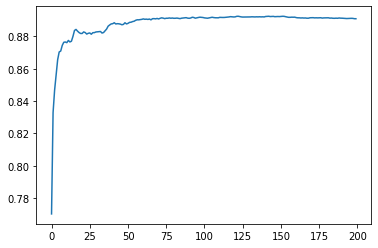

In [92]:
preds = np.stack(tree.predict(val_set_selected_features) for tree in model.estimators_)
plt.plot([r2_score(val_lab, np.mean(preds[:i+1], axis = 0)) for i in range(200)]);

## Interpret

In [94]:
importance = sorted(model.feature_importances_, reverse = True)

In [95]:
np.argsort(model.feature_importances_)

array([ 6, 46,  2, 74, 76, 77, 15, 58, 27, 11, 61,  3, 44, 53, 42, 75, 19,
       22, 73, 24, 29, 10,  8, 23, 65,  5, 36, 20,  7, 12, 26, 41, 28, 71,
       51, 14, 13, 17, 16, 78, 54, 34, 30, 72,  4, 45, 47, 18, 39, 37, 63,
       60, 32, 64,  1, 68, 21, 48, 57, 66, 50,  0, 52, 70, 43, 55, 49, 25,
       56, 38, 67, 35, 62, 40, 69, 59, 33,  9, 31])

In [96]:
features = numerical_features + categorical_features_encoded + ordinal_features_encoded
y_values = []
x_values = []

for index in np.argsort(model.feature_importances_)[::-1][:20][::-1]:
    x_values.append(features[index])
    y_values.append(model.feature_importances_[index])

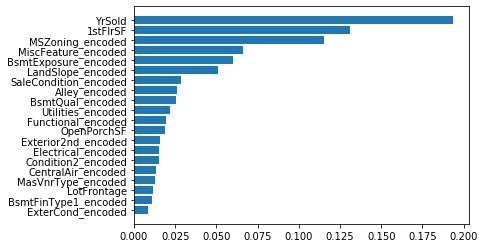

In [97]:
fig, ax = plt.subplots()
y_pos = range(len(y_values))
ax.barh(y_pos, y_values)
ax.set_yticks(y_pos)
ax.set_yticklabels(x_values)
plt.show()

## Submit

In [170]:
test_set = pd.read_csv('test.csv')

In [171]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Encoding test set

In [99]:
test_set = encode_dataframe(test_set, train=False, 
                           train_set_categorical_encoded_means=train_val_categorical_global_means)

In [100]:
# test_set.sample(10)

In [101]:
test_set_selected_features = test_set[categorical_features_encoded + ordinal_features_encoded + numerical_features]

In [102]:
# Problem: some categorical feature values appear in the test set but not in the training or validation set, so they
# do not have a target mean that can be mapped onto the feature values in the test set

# step 1: find out which feature values appar in the test set but not in the training/validation set

# create two emtpy lists
unequal_features = []
unequal_values = []

for feature in categorical_features:
    # create two lists with every categorical feature value in the train and test set, respectively
    # .index return index (in this case name of categorical feature of Series), .tolist() turns it into a list
    train_set_feature_values = train_set[feature].value_counts().index.tolist()
    test_set_feature_values = test_set[feature].value_counts().index.tolist()
    # append the feature and the feature value to a list if it appears in the test set ut not in the training/validation set
    for i in test_set_feature_values:
        if not i in train_set_feature_values:
            unequal_features.append(feature)
            unequal_values.append(i)
            
print(unequal_features)
print(unequal_values)

['MSSubClass', 'MSZoning', 'Utilities', 'Condition2', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType']
[150, 'missing', 'missing', 'PosA', 'missing', 'missing', 'missing', 'missing']


In [103]:
# step 2: replace the categorical feature values which only appear in the test set with the global SalePrice mean

# create a list of encoded features 
unequal_features_encoded = [feature + '_encoded' for feature in unequal_features]

for i in range(len(unequal_features)):
    # create a new dictionary
    test_categorical_encoding = {}
    # create a new dict (with the encoded feature name as a key) inside the new dict
    test_categorical_encoding[unequal_features_encoded[i]] = {}
    # set the global SalePrice mean as the value for each key
    test_categorical_encoding[unequal_features_encoded[i]][unequal_values[i]] = train_set.SalePrice.mean()
    # replace the feature value in the test set with the dict (which includes the SalePrice mean for the feature value
    # that only appears in the test set)
    test_set_selected_features = test_set_selected_features.replace(test_categorical_encoding)

In [104]:
test_set_selected_features = test_set_selected_features.apply(pd.to_numeric)

In [105]:
test_set_selected_features.sample(5)

,MSSubClass_encoded,MSZoning_encoded,Street_encoded,Alley_encoded,LotShape_encoded,LandContour_encoded,Utilities_encoded,LotConfig_encoded,LandSlope_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,MasVnrType_encoded,Foundation_encoded,Heating_encoded,Electrical_encoded,Functional_encoded,GarageType_encoded,Fence_encoded,MiscFeature_encoded,MoSold_encoded,SaleType_encoded,SaleCondition_encoded,OverallQual_encoded,OverallCond_encoded,ExterQual_encoded,ExterCond_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,CentralAir_encoded,HeatingQC_encoded,KitchenQual_encoded,FireplaceQu_encoded,GarageQual_encoded,GarageFinish_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
756,12.054745,12.031055,12.031378,12.045366,11.948454,12.082516,12.031236,12.011700,12.068783,11.665066,12.048364,12.031996,12.054752,12.003906,11.991663,12.027696,11.760650,12.207122,11.655984,11.655984,11.908531,11.699808,11.896166,11.742165,12.031055,12.161726,12.064360,12.035123,12.041196,11.999704,11.840915,1,5,2,1,3.573852,2.994342,1.667845,0,1,2.0,3.423868,2.0,1.0,1.0,1,3.666667,80.0,14584,1952,1952,0.0,0.0,0.0,0.0,0.0,733,0,0,733,0.0,0.0,1,0,2,1,4,0,1952.0,2.0,487.0,0,0,0,0,0,0,0,2008
824,12.161543,12.088969,12.031378,12.045366,11.948454,12.031056,12.031236,12.011700,12.027223,11.968333,12.048364,12.031996,11.839082,12.003906,11.991663,12.027696,12.054305,11.893327,12.291545,12.048250,11.908531,11.881478,12.038822,12.065112,12.047687,12.161726,12.064360,12.035123,11.990942,11.999704,12.009189,7,7,3,3,4.000000,3.000000,1.000000,1,3,3.0,3.423868,3.0,1.0,3.0,3,3.666667,24.0,2304,1978,1978,0.0,632.0,6.0,423.0,1061.0,1055,0,0,1055,0.0,0.0,2,0,2,1,4,0,1978.0,1.0,319.0,108,32,0,0,0,0,0,2007
1065,12.054745,12.088969,12.031378,12.045366,12.149293,12.031056,12.031236,12.238062,12.027223,12.165884,12.048364,12.031996,12.054752,12.003906,11.991663,12.027696,12.212257,12.208901,11.952321,12.048250,11.908531,11.881478,12.038822,12.065112,12.047687,11.790778,11.890665,12.035123,11.985720,11.999704,12.009189,5,5,3,3,4.000000,3.000000,3.000000,1,3,3.0,3.423868,3.0,1.0,3.0,3,3.666667,45.0,8982,1977,1977,0.0,539.0,0.0,501.0,1040.0,1040,0,0,1040,0.0,0.0,1,1,3,1,5,0,1977.0,2.0,748.0,0,0,0,0,0,0,0,2007
61,12.054745,12.088969,12.031378,12.045366,11.948454,12.031056,12.031236,12.011700,12.027223,11.887648,12.048364,12.031996,12.054752,12.003906,11.991663,12.027696,11.849029,11.862926,11.876196,12.048250,12.381494,11.881478,12.038822,12.065112,12.047687,12.161726,11.815090,12.035123,12.017538,11.999704,12.009189,6,5,3,3,3.000000,3.000000,1.000000,1,5,3.0,4.000000,3.0,1.0,3.0,3,3.666667,80.0,10032,1959,1959,432.0,734.0,0.0,510.0,1244.0,1580,0,0,1580,1.0,0.0,1,1,3,1,6,2,1956.0,2.0,440.0,0,28,0,0,160,0,0,2010
349,12.005893,11.718196,12.031378,11.755999,11.948454,12.031056,12.031236,12.011700,12.027223,11.758467,12.048364,12.031996,12.054752,12.179594,11.991663,12.027696,11.849029,11.862926,11.952321,12.048250,11.908531,11.779916,12.038822,11.742165,12.047687,11.790778,11.890665,12.035123,12.013028,11.999704,12.009189,5,6,3,3,3.000000,3.000000,1.000000,1,3,3.0,4.000000,3.0,1.0,3.0,3,3.666667,57.0,6406,1939,1950,0.0,421.0,0.0,269.0,690.0,868,690,0,1558,0.0,0.0,1,1,3,1,7,1,1939.0,2.0,400.0,0,36,0,0,182,0,0,2009


### Predicting and submitting test set

In [106]:
submission_predicted = model.predict(test_set_selected_features)

In [107]:
test_set['SalePrice'] = submission_predicted

In [109]:
test_set['SalePrice'] = np.expm1(test_set['SalePrice'])

In [110]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSSubClass_encoded,MSZoning_encoded,Street_encoded,Alley_encoded,LotShape_encoded,LandContour_encoded,Utilities_encoded,LotConfig_encoded,LandSlope_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,BsmtFinType1_encoded,BsmtFinType2_encoded,MasVnrType_encoded,Foundation_encoded,Heating_encoded,Electrical_encoded,Functional_encoded,GarageType_encoded,Fence_encoded,MiscFeature_encoded,MoSold_encoded,SaleType_encoded,SaleCondition_encoded,OverallQual_encoded,OverallCond_encoded,ExterQual_encoded,ExterCond_encoded,BsmtQual_encoded,BsmtCond_encoded,BsmtExposure_encoded,CentralAir_encoded,HeatingQC_encoded,KitchenQual_encoded,FireplaceQu_encoded,GarageQual_encoded,GarageFinish_encoded,GarageCond_encoded,PavedDrive_encoded,PoolQC_encoded,SalePrice
0,1461,20,RH,80.0,11622,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,missing,0,6,2010,WD,Normal,12.054745,11.8553,12.031378,12.045366,11.948454,12.031056,12.0312,12.011700,12.027223,11.887648,11.855844,12.032,12.054752,12.0039,11.991663,12.0277,12.2035,12.2071,11.876196,11.979286,11.908531,11.881478,12.0388,12.0651,12.0477,12.161726,11.890665,12.035123,12.017538,11.9997,12.009189,5,6,3,3,3.0,3.0,1.0,1,3,3.0,3.423868,3.0,1.0,3.0,3,3.666667,118021.010487
1,1462,20,RL,81.0,14267,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,missing,Gar2,12500,6,2010,WD,Normal,12.054745,12.089,12.031378,12.045366,12.149293,12.031056,12.0312,12.012909,12.027223,11.887648,12.048364,12.032,12.054752,12.0039,12.173504,12.0277,11.849,11.8629,11.952321,12.048250,12.148033,11.881478,12.0388,12.0651,12.0477,12.161726,12.064360,12.042303,12.017538,11.9997,12.009189,6,6,3,3,3.0,3.0,1.0,1,3,4.0,3.423868,3.0,1.0,3.0,3,3.666667,153410.276756
2,1463,60,RL,74.0,13830,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,missing,0,3,2010,WD,Normal,12.328878,12.089,12.031378,12.045366,12.149293,12.031056,12.0312,12.011700,12.027223,12.155763,12.048364,12.032,12.054752,12.1796,11.991663,12.0277,12.2035,12.2071,12.291545,12.048250,11.908531,12.251416,12.0388,12.0651,12.0477,12.161726,11.890665,12.035123,12.014293,11.9997,12.009189,5,5,3,3,4.0,3.0,1.0,1,4,3.0,3.000000,3.0,3.0,3.0,3,3.666667,177524.297048
3,1464,60,RL,78.0,9978,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA

In [111]:
submission = test_set[['Id', 'SalePrice']]
submission.head()

,Id,SalePrice
0,1461,118021.010487
1,1462,153410.276756
2,1463,177524.297048
3,1464,194037.391512
4,1465,202525.732219


In [112]:
submission.to_csv (r'/Users/Helene/desktop/house_prices_sub.csv', index = False, header=True)